# <b> Lab 2 : Lossy image compression </b>

<i> Compte-rendu par Valentin SÉRÉE et Jérémy SERENA [INFO3]</i>

<b> <u> Question 1 </u> </b>

<i> Récupération de l'image </i>

<b> <u> Question 2 </u> </b>

Nous allons appliquer l'algorithme k-means à une image. Cet algorithme de clustering permet d'analyser le jeu de données qu'est l'image afin de regrouper les donnéees similaires en clusters (ici pouvoir "rassembler" des couleurs proches).

<hr>
<div style = "font-family: Courier">
    <p style = "font:font-weight: bold; color: #ffecc5">
        kMeansAlgo
    </p>
    <div style = "padding-left: 15px; color: #b6cff5">
        <b>@in :</b> k = nombre de clusters 
        </br>
        <b>@out :</b> image =  tableau représentant l'image d'origine
        </br>
        <b>@out :</b> segmented_image = tableau représentant l'image clusterisée
    </div>
</div>
<hr><br>
<div>
Cette fonction prend en entrée le nombre de clusters à créer pour l'image (variable globale). L'image va être passée à travers l'algorithme k-means (fonctions Python) puis ressortie sous la forme d'un tableau avec uniquement k couleurs.</div>



[[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
  2 7 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 7 5 5 5 3 5 7 1 8 8 6 6 6 6 6 6 6 6 6
  6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
  7 7 5 5 5 5 5 5 5 5 5 7 5 7 7 5 5 7 5 5 5 3 3 5 7 1 8 6 6 6 6 6 6 6 6 6
  6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]]


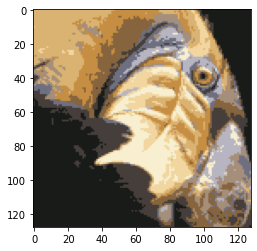

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

imgPath = 'ex9Data/bird_small.tiff'

def kMeansAlgo(k):
    global imgPath
    image = cv2.imread(imgPath) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
    pixel_vals = image.reshape((-1,3)) 
    pixel_vals = np.float32(pixel_vals)
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
    centers = np.uint8(centers) 
    codebook = {}
    listCenters = list(centers)
    for i in range (len(listCenters)):
        codebook[i] = list(listCenters[i])
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape)) 
    img = codebookImage(segmented_image, codebook)
    return img, codebook

def codebookImage(img, cb):
    image = []
    for i in range (len(img)):
        ligne = []
        for j in range (len(img[0])):
            for k in range (len(cb)):
                if (np.array(cb[k]) == img[i][j]).all():
                    ligne.append(k)
        image.append(np.array(ligne))
        ligne = []
    return np.array(image)

def dessinerImg(img):
    plt.imshow(img)

def remettreEnPlace(img, cb):
    image = []
    for i in range (len(img)):
        ligne = []
        for j in range (len(img[0])):
            ligne.append(np.array(cb[img[i][j]]))
        image.append(np.array(ligne))
        ligne = []
    return np.array(image)

#Question 3
imgSeg, codebk = kMeansAlgo(10)
print(imgSeg[:2])
dessinerImg(remettreEnPlace(imgSeg, codebk))

<b> <u> Question 3 </u> </b>

Nous allons mettre en oeuvre l'algorithme réalisé ci-dessus pour 

In [6]:
#Question 4

from sklearn.metrics import mean_squared_error
import numpy as np

def D(k):
    (img, imgseg) = kMeansAlgo(k)
    MSE = np.square(np.subtract(img,imgseg)).mean()    
    return MSE

D(10)

75.12355550130208

In [7]:
#Question 4

def codingRateRLE(k):
    (img, imgData) = kMeansAlgo(k)
    res, codebook, index = [], {}, 0
    for i in range(len(imgData)): # on parcourt toutes les lignes de l'image
        colorActual = imgData[i][0] # on initialise la première couleur
        string_row = "" # chaîne représentant la ligne en cours d'étude
        nombrePixel = 0 # nombre de pixels de cette couleur
        for j in range(len(imgData[0])): # on parcourt une ligne de l'image
            if (imgData[i][j] == colorActual).all() : # si la couleur du pixel étudié est identique à la précédente
                nombrePixel += 1 # on augmente
            else : # sinon (si la couleur est différente)
                if nombrePixel != 0 : # si le nombre de pixel est non nul
                    (codeIn, codebook, index) = miseEnDico(codebook, colorActual, index)
                    string = str(codeIn) + " " + str(nombrePixel) + ";"
                    string_row += string
                nombrePixel = 1
                colorActual = imgData[i][j]
                codeIn = codebook.get(colorToKey(list(colorActual)))
        colorActual = imgData[i][j]
        (codeIn, codebook, index) = miseEnDico(codebook, colorActual, index)
        string = str(codeIn) + " " + str(nombrePixel)
        string_row += string
        res.append(string_row)
        nombrePixel = 0
    return res, codebook

In [8]:
# Fonctions annexes TP2 Q4

def colorToKey(liste):
    string = ""
    for i in range (3):
        string+= str(liste[i])
        if i != 2:
            string+= ","
    return string

def miseEnDico(dico, color, index):
    cle = colorToKey(list(color))
    if cle not in dico: # on regarde si on connaît ce code couleur dans le codebook
        dico[cle]=index # on ajoute la clé au dictionnaire
        code = index # on conserve le code de cette couleur
        index+=1
    else: # si la clé est connue
        code = dico.get(cle) # on récupère le code de cette couleur
    return (code,dico, index)


    

['0 93;1 1;0 2;2 2;3 30', '0 93;1 2;0 2;2 1;3 30', '0 94;1 1;0 3;3 30', '0 75;4 1;0 2;4 1;0 1;4 1;0 14;1 2;0 1;2 1;3 2;2 1;3 26', '0 50;2 2;0 6;2 5;0 10;4 4;0 1;4 1;0 1;4 3;0 12;1 2;0 2;3 2;2 2;3 25', '0 53;2 14;0 3;2 1;4 13;0 11;1 3;0 1;2 1;3 1;2 2;3 25', '0 53;2 18;4 14;0 11;1 3;0 1;2 1;4 1;2 1;3 25', '0 53;2 19;4 6;2 1;4 7;0 10;1 3;0 3;2 1;3 25', '0 52;2 19;4 3;2 6;4 7;0 9;1 4;0 2;2 2;3 24', '0 28;4 3;0 20;2 19;4 2;2 2;3 1;2 7;4 2;2 1;4 3;0 8;1 4;0 2;2 2;3 24'] {'209,165,97': 0, '237,222,187': 1, '119,93,68': 2, '31,32,29': 3, '151,142,145': 4}


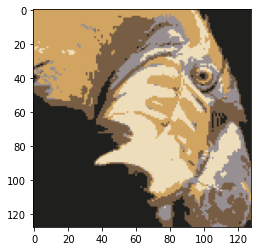

In [5]:
#Test Q4

(result, cb) = codingRateRLE(5)
print(result[0:10],cb)
(im1, im2)=kMeansAlgo(5)
dessinerImg(im2)

In [9]:
import math

def R(k) :
    (result, cb) = codingRateRLE(k)
    weight_codebook = 3*8*k
    ligne = list(result[0])
    i = len(ligne)
    nb_pixel = 0
    save = False
    j = 0
    valeur = ""
    while j < i :
        if ligne[j] == ' ' :
            save = True
        elif ligne[j] == ';' :
            nb_pixel += int(valeur)
            valeur =""
            save = False
        elif save :
            valeur +=ligne[j]
        else :
            pass
        j += 1
    nb_pixel += int(valeur)  #nombre de pixel par ligne
    count = 0               #nombre de valeurs différentes pour toutes les lignes
    for line in result :
        compteur = 1
        val = list(line)
        for c in val :
            if c == ';' :
                compteur += 1
        count += compteur
    nb_ligne = len(result)
    taille_couleur = int(math.ceil(math.log2(k)))
    taille_valeur = int(math.ceil(math.log2(nb_pixel)))
    resultat = (weight_codebook + count*(taille_valeur+taille_couleur))/(nb_pixel*nb_ligne)
    return resultat

In [10]:
def reconstructionImage(RLE, codebook):
    decodebook = changementDico(codebook)
    image = []
    for i in range (len(RLE)):
        ligne = []
        liste = RLE[i].split(";")
        for j in range(len(liste)):
            liste2 = liste[j].split(" ")
            for k in range (int(liste2[1])):
                ligne.append(decodebook.get(int(liste2[0])))
        image.append(np.array(ligne))
    return np.array(image)

def keyToColor(string):
    liste = string.split(",")
    listeARendre = []
    for i in range(3):
        listeARendre.append(int(liste[i]))
    return np.array(listeARendre)

def changementDico(dico):
    dictionnaireCouleurs = {}
    for cle,valeur in dico.items():
        dictionnaireCouleurs[valeur]=keyToColor(cle)
    return dictionnaireCouleurs

img = reconstructionImage(result, cb)
dessinerImg(img)


NameError: name 'result' is not defined

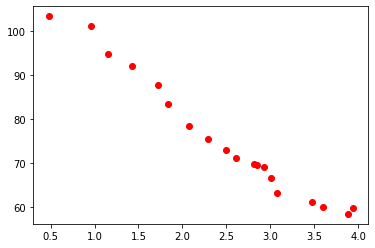

In [14]:
# Question 5
from matplotlib import pyplot

def courbeDR():
    Lx = []
    Ly = []
    for k in range (2, 21):
        Lx.append(R(k))
        Ly.append(D(k))
    pyplot.scatter(Lx, Ly, c = 'red')

courbeDR()


In [ ]:
# I(x,y)= H(x) + H(y) - H(x,y)
# I(x,y) = Somme(j=0 à J-1) Somme(k=0 à K-1) p(xj,yk).log2(p(xj,yk)/[p(xj)*p(yk)])